## Observations and Insights 

In [244]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(left=mouse_metadata, right=study_results)
# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [245]:
# Checking the number of mice.
print(merged.nunique())

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64


In [246]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(merged['Mouse ID'].value_counts())

g989    13
z578    10
j296    10
y865    10
s185    10
        ..
b447     1
n482     1
d133     1
t573     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64


In [247]:
# Optional: Get all the data for the duplicate mouse ID. 
doublemouse = merged[merged.duplicated(['Mouse ID', 'Timepoint'])]
print(doublemouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [248]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = merged.drop([909, 911, 913, 915, 917])
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [249]:
# Checking the number of mice in the clean DataFrame.
print(clean.nunique())

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1640
Metastatic Sites         5
dtype: int64


## Summary Statistics

In [254]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
clean_mean = clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
clean_median = clean.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
clean_variance = clean.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
clean_standard_deviation = clean.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
clean_sem = clean.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary = pd.DataFrame({
    'Median': clean_median,
    'Variance': clean_variance,
    'Std_Deviation': clean_standard_deviation,
    'SEM': clean_sem
}) 
summary

,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,
Capomulin,41.557809,24.947764,4.994774,0.329346
Ceftamin,51.776157,39.290177,6.268188,0.469821
Infubinol,51.820584,43.128684,6.567243,0.492236
Ketapril,53.698743,68.553577,8.279709,0.603860
Naftisol,52.509285,66.173479,8.134708,0.596466
Placebo,52.288934,61.168083,7.821003,0.581331
Propriva,50.909965,43.138803,6.568014,0.525862
Ramicane,40.673236,23.486704,4.846308,0.320955
Stelasyn,52.431737,59.450562,7.710419,0.573111


In [255]:
# Using the aggregation method, produce the same summary statistics in a single line
summary.agg("mean", axis="rows")

Median           49.948493
Variance         47.787119
Std_Deviation     6.815695
SEM               0.500938
dtype: float64

## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

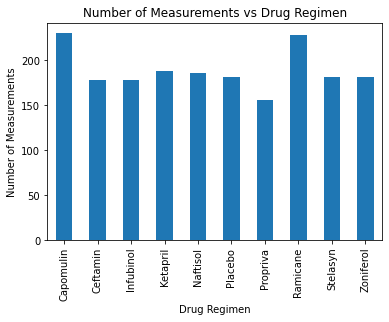

In [256]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
barpd_data = clean.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot_data = barpd_data.plot.bar(rot='vertical',title='Number of Measurements vs Drug Regimen')

bar_plot_data.set_xlabel("Drug Regimen")
bar_plot_data.set_ylabel("Number of Measurements")

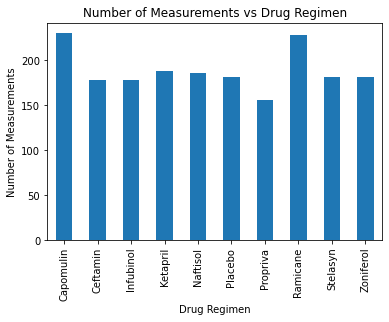

In [257]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
barpd_data = clean.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
barpd_data_df = pd.DataFrame(barpd_data)

plt.xdata = barpd_data_df.plot.bar(legend=False)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements vs Drug Regimen')

plt.show()


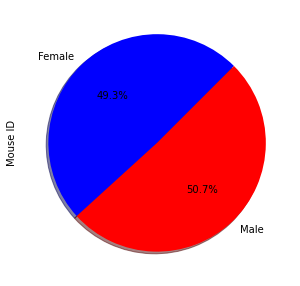

In [258]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean.groupby('Sex').count()['Mouse ID']
colors = ['blue', 'red']
plot = sex.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=45, shadow = True, autopct="%1.1f%%")

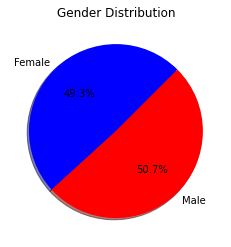

In [259]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = pd.DataFrame(sex)
plt.pie(sex,labels=sex.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=45);
plt.title('Gender Distribution')
plt.show()


## Quartiles, Outliers and Boxplots

In [260]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap = clean.loc[clean["Drug Regimen"] == "Capomulin",:]
ram = clean.loc[clean["Drug Regimen"] == "Ramicane", :]
inf = clean.loc[clean["Drug Regimen"] == "Infubinol", :]
cef = clean.loc[clean["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
cap = clean.loc[clean['Drug Regimen']== 'Capomulin']['Tumor Volume (mm3)'] 
capquantiles = cap.quantile([.25, .5, .75])
caplowerq = capquantiles[.25]
capupperq = capquantiles[.75]
capIQR = capupperq-caplowerq
caplowerbound = caplowerq-(1.5*capIQR)
capupperbound = capupperq+(1.5*capIQR)
print(f"Capomulin potential outliers: {cap.loc[(cap < caplowerbound) | (cap > capupperbound)]}")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Capomulin potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


In [261]:
ram = clean.loc[clean['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
ramquantiles = ram.quantile([.25, .5, .75])
ramlowerq = ramquantiles[.25]
ramupperq = ramquantiles[.75]
ramIQR = ramupperq-ramlowerq
ramlowerbound = ramlowerq-(1.5*ramIQR)
ramupperbound = ramupperq+(1.5*ramIQR)
print(f"Ramicane potential outliers: {ram.loc[(ram < ramlowerbound) | (ram > ramupperbound)]}")

Ramicane potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64


In [262]:
inf = clean.loc[clean['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
infquantiles = inf.quantile([.25, .5, .75])
inflowerq = infquantiles[.25]
infupperq = infquantiles[.75]
infIQR = infupperq-inflowerq
inflowerbound = inflowerq-(1.5*infIQR)
infupperbound = infupperq+(1.5*infIQR)
print(f"Infubinol potential outliers: {inf.loc[(inf < inflowerbound) | (inf > infupperbound)]}")

Infubinol potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [263]:
cef = clean.loc[clean['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
cefquantiles = cef.quantile([.25, .5, .75])
ceflowerq = cefquantiles[.25]
cefupperq = cefquantiles[.75]
cefIQR = cefupperq-ceflowerq
ceflowerbound = ceflowerq-(1.5*cefIQR)
cefupperbound = cefupperq+(1.5*cefIQR)
print(f"Ceftamin potential outliers: {cef.loc[(cef < ceflowerbound) | (cef > cefupperbound)]}")


Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [264]:
final_four = clean[clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_four = final_four.sort_values(["Timepoint"], ascending=False)
final_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
75,z578,Ramicane,Male,11,16,0,45.000000,0
1113,l490,Ceftamin,Male,24,26,0,45.000000,0
1120,l558,Ceftamin,Female,13,30,0,45.000000,0
1123,l661,Ceftamin,Male,18,26,0,45.000000,0


In [265]:
fin_data = final_four[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

In [266]:
maxtumor = final_four.groupby(['Mouse ID']).max().reset_index()
mergeddata = maxtumor[['Mouse ID', 'Timepoint']].merge(final_four, on = ['Mouse ID', 'Timepoint'], how = 'left')

mergeddata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [267]:
# Put treatments into a list for for loop (and later for plot labels)
treat = ['Ramicane', 'Infubitol', 'Ceftamin', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mergeddata['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cef_qua = cef_max_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
inf_qua = inf_max_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
cap_qua = cap_max_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
ram_qua = ram_max_merge['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    
    
    # Determine outliers using upper and lower bounds

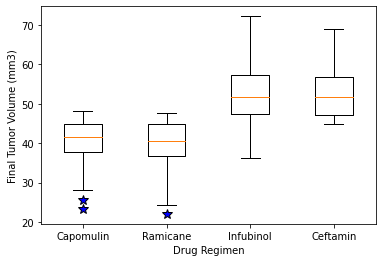

In [268]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor = 'blue', markersize = 10, marker = '*')
plt.boxplot([cap, ram, inf, cef], labels = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'],flierprops = outlier)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

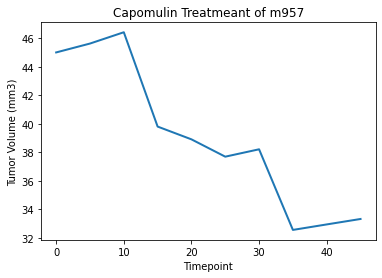

In [269]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = c_df.loc[c_df["Mouse ID"] == "m957",:]
line_df.head()

x_axis_tp = line_df["Timepoint"]
tv = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of m957')
plt.plot(x_axis_tp,tv,linewidth=2, markersize=5)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

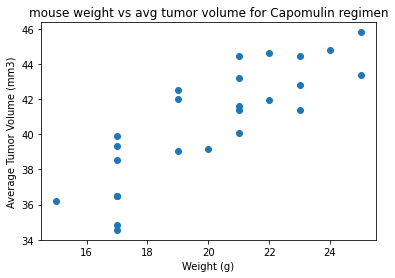

In [270]:
c_df_average = c_df.groupby(['Mouse ID']).mean()
plt.scatter(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('mouse weight vs avg tumor volume for Capomulin regimen')
plt.savefig('scatterplotaverage')
plt.show()

## Correlation and Regression

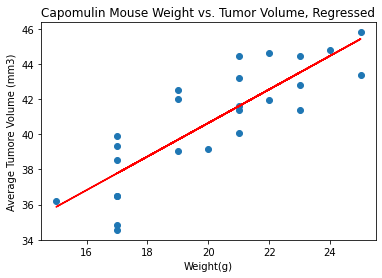

In [273]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
lr_model=st.linregress(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])
lr_model

lr_slope = 0.9544396890241045 
lr_intercept= 21.552160532685015

y_values = c_df_average['Weight (g)']*lr_slope+lr_intercept
plt.scatter(c_df_average['Weight (g)'],c_df_average['Tumor Volume (mm3)'])

plt.plot(c_df_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.title('Capomulin Mouse Weight vs. Tumor Volume, Regressed')

plt.savefig('regression')
plt.show()